In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
fig = plt.figure()
def loss_fun(y,y_pred):
    n = len(y)
    sum = 0
    for i in range(n):
        sum += (y[i]-y_pred[i])**2
    mse = 1/n*(sum)
    # print(mse)
    return mse

<Figure size 640x480 with 0 Axes>

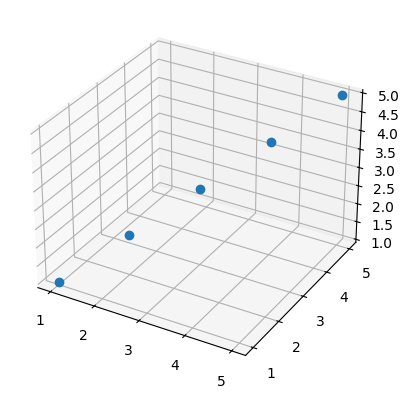

In [16]:
ax = plt.axes(projection ='3d')

# plotting
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
z = np.array([1,2,3,4,5])
# Parameters for the true linear relationship
# m_true = 2.5  # Slope
# b_true = 4.0  # Intercept

# # Generate random x values
# np.random.seed(42)  # For reproducibility
# x = np.random.uniform(0, 10, 100)  # 100 points between 0 and 10
# z = np.random.uniform(0, 10, 100)  # 100 points between 0 and 10

# # Generate y values based on the line equation y = mx + b with added noise
# noise = np.random.normal(0, 2, len(x))  # Random noise with mean 0 and standard deviation 2
# y = m_true * x + b_true + noise
ax.plot3D(x, z,y, 'o')
# ax.view_init(120, 30) 

plt.show()

In [17]:
def cal_line(y,epoch):
    m,n,c = 0,0,0          #initializing random value
    alpha = 0.01
    n = len(y)
    # plt.plot(x,y,z,'o')
    for i in range(epoch):
        y_hat = m*x+n*z+c      #predicting based on random value
        dm = dm_cal(y_hat)
        dn = dn_cal(y_hat)
        dc = dc_cal(y_hat)    
        # if i in (0,5,100,500):
        #     plt.plot(x,y_hat,linestyle='--')
            
        m = m-alpha*dm
        n = n-alpha*dn
        c = c-alpha*dc
        # loss = loss_fun(y,y_hat)
        # print("Loss: ",loss)
    # plt.plot(x,z,y_hat)
    ax.plot3D(x,z, y)

    print("m: ",m," n:",n," c: ",c)
    return y_hat

In [18]:
def dm_cal(y_hat):
    n = len(y_hat)
    sum = 0
    for i in range(n):
        sum += x[i]*(y[i]-y_hat[i])
    dm = (-2/n)*sum
    return dm
    
def dn_cal(y_hat):
    n = len(y_hat)
    sum = 0
    for i in range(n):
        sum += z[i]*(y[i]-y_hat[i])
    dn = (-2/n)*sum
    return dn

In [19]:
def dc_cal(y_hat):
    n = len(y_hat)
    sum = 0
    for i in range(n):
        sum += (y[i]-y_hat[i])
    dc = (-2/n)*sum
    return dc

m:  -1.9978251322822467  n: 3.0021748677177587  c:  -0.01582198260598284


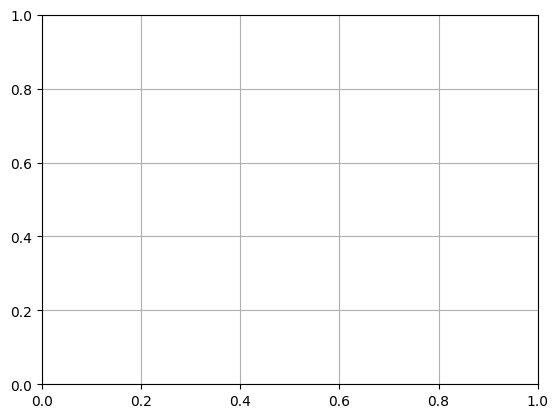

In [20]:
plt.grid(True)
y_predicted = cal_line(y,1000)      #m:  [2.40805434]  c:  [4.43013382]

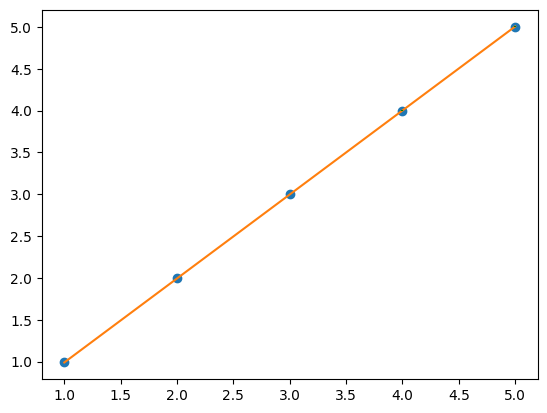

In [21]:
plt.plot(x,y,'o')
plt.plot(x,y_predicted, label = "predicted line")

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_predicted[i]], color="green", linestyle="--")
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [61]:
x = x.reshape(-1,1)
z = z.reshape(-1,1)
y = y.reshape(-1,1)
lr.fit(x,z,y)

ValueError: Sample weights must be 1D array or scalar